### PRAGADEESH M
## 225229126

### Steps
##### 1. Create a dataset

In [11]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio

##### 2. Read the audio

In [9]:
paths = "dataset/map1.mp3"
Audio(paths)

In [74]:
path = "C:/Users/2mscdsa26/dataset"
feature = []
label = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
for file in os.listdir(path):
    if file.endswith(".mp3"):
        file_path = f"{path}\{file}"
        audio, sample_rate = librosa.load(file_path)
        stftt = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
        stftt_scaled_features = np.mean(stftt.T, axis=0)
        feature.append(stftt_scaled_features)

In [86]:
feature[0]

array([0.53728104, 0.45855737, 0.38242012, 0.49541202, 0.6626459 ,
       0.58147824, 0.6284042 , 0.65780675, 0.54814225, 0.4306519 ,
       0.47813433, 0.5366715 ], dtype=float32)

In [82]:
df = pd.DataFrame({'label':label})
df['features'] = feature

In [85]:
df.head()

,label,features
0,0,"[0.53728104, 0.45855737, 0.38242012, 0.4954120..."
1,0,"[0.25571325, 0.28795403, 0.33081937, 0.3386063..."
2,0,"[0.2961325, 0.31955755, 0.2501093, 0.2581877, ..."
3,0,"[0.3366835, 0.41455317, 0.3041567, 0.271756, 0..."
4,0,"[0.2022142, 0.17618132, 0.18341273, 0.28600985..."


##### 3. Split the dataset

In [89]:
X = np.array(df['features'].tolist())
y = np.array(df['label'])

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

##### 4. Train a Neural Network model

In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical

model=Sequential()
model.add(Dense(128, activation='tanh', input_shape=(12,)))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='mean_squared_error',metrics=['accuracy'],optimizer='adam')
history=model.fit(X_train, y_train, batch_size=32, epochs=10 , verbose=2,validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-traina

##### 5. Run different NeuralNetworks models

In [98]:
def layerandnodes (n,l):
    model = Sequential()
    for x in range(l):
        model.add(Dense(n,activation='tanh'))
    model.add(Dense(l, activation='sigmoid'))
    model.compile(loss='mse',optimizer='Adam',metrics=['accuracy'])
    model.fit(X_train,y_train, epochs=10)
    return model.evaluate(X_test,y_test)

In [104]:
layerandnodes(8,2)

Epoch 1/10
1/1 [==============================] - 1s 753ms/step - loss: 0.2543 - accuracy: 0.4667
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2535 - accuracy: 0.4667
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 0.2527 - accuracy: 0.4667
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2520 - accuracy: 0.4667
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2514 - accuracy: 0.4667
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 0.2509 - accuracy: 0.4667
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2504 - accuracy: 0.4667
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.4667
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2497 - accuracy: 0.6000
Epoch 10/10
1/1 [==============================] - 0s 154ms/step - loss: 0.2477 - accuracy: 0.8000


[0.24770383536815643, 0.800000011920929]

In [105]:
layerandnodes(8,3)

Epoch 1/10
1/1 [==============================] - 1s 589ms/step - loss: 0.2539 - accuracy: 0.5333
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2535 - accuracy: 0.5333
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2531 - accuracy: 0.5333
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2527 - accuracy: 0.5333
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2524 - accuracy: 0.5333
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 0.2520 - accuracy: 0.5333
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2517 - accuracy: 0.5333
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2514 - accuracy: 0.5333
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2511 - accuracy: 0.5333
Epoch 10/10
1/1 [==============================] - 0s 168ms/step - loss: 0.2492 - accuracy: 0.4000


[0.24923649430274963, 0.4000000059604645]

In [106]:
layerandnodes(8,4)

Epoch 1/10
1/1 [==============================] - 1s 970ms/step - loss: 0.2545 - accuracy: 0.4667
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2537 - accuracy: 0.4667
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2530 - accuracy: 0.4667
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2523 - accuracy: 0.4667
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2518 - accuracy: 0.4667
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2513 - accuracy: 0.4667
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2509 - accuracy: 0.4000
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2506 - accuracy: 0.3333
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2504 - accuracy: 0.3333
Epoch 10/10
1/1 [==============================] - 0s 187ms/step - loss: 0.2604 - accuracy: 0.4000


[0.26042473316192627, 0.4000000059604645]

In [107]:
layerandnodes(16,2)

Epoch 1/10
1/1 [==============================] - 1s 542ms/step - loss: 0.2599 - accuracy: 0.5333
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 0.2589 - accuracy: 0.5333
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2581 - accuracy: 0.5333
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2574 - accuracy: 0.5333
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2568 - accuracy: 0.4667
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2562 - accuracy: 0.4667
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2557 - accuracy: 0.4667
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2553 - accuracy: 0.4667
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2549 - accuracy: 0.4667
Epoch 10/10
1/1 [==============================] - 0s 153ms/step - loss: 0.2550 - accuracy: 0.6000


[0.2550375461578369, 0.6000000238418579]

In [108]:
layerandnodes(16,3)

Epoch 1/10
1/1 [==============================] - 1s 600ms/step - loss: 0.2577 - accuracy: 0.0667
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2559 - accuracy: 0.0667
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 0.2543 - accuracy: 0.0667
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2532 - accuracy: 0.0667
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2523 - accuracy: 0.1333
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2517 - accuracy: 0.2000
Epoch 7/10
1/1 [==============================] - 0s 13ms/step - loss: 0.2513 - accuracy: 0.2667
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 0.2511 - accuracy: 0.3333
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2509 - accuracy: 0.4000
Epoch 10/10
1/1 [==============================] - 0s 183ms/step - loss: 0.2544 - accuracy: 0.4000


[0.2544250786304474, 0.4000000059604645]

In [109]:
layerandnodes(16,4)

Epoch 1/10
1/1 [==============================] - 1s 655ms/step - loss: 0.2530 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 0.2520 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2511 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2503 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2495 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2489 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2483 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2477 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2472 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 186ms/step - loss: 0.2450 - accuracy: 0.2000

[0.24495437741279602, 0.20000000298023224]

In [110]:
layerandnodes(32,2)

Epoch 1/10
1/1 [==============================] - 1s 540ms/step - loss: 0.2515 - accuracy: 0.6000
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2498 - accuracy: 0.6000
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2484 - accuracy: 0.6000
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2472 - accuracy: 0.5333
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 0.2463 - accuracy: 0.5333
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2456 - accuracy: 0.3333
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 0.2451 - accuracy: 0.4000
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2447 - accuracy: 0.4667
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 0.2443 - accuracy: 0.3333
Epoch 10/10
1/1 [==============================] - 0s 155ms/step - loss: 0.2627 - accuracy: 0.6000


[0.26269441843032837, 0.6000000238418579]

In [111]:
layerandnodes(32,3)

Epoch 1/10
1/1 [==============================] - 1s 608ms/step - loss: 0.2568 - accuracy: 0.4667
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2538 - accuracy: 0.4667
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2518 - accuracy: 0.4000
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2506 - accuracy: 0.2667
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 0.2499 - accuracy: 0.3333
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2495 - accuracy: 0.3333
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2491 - accuracy: 0.4667
Epoch 8/10
1/1 [==============================] - 0s 28ms/step - loss: 0.2487 - accuracy: 0.4000
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2482 - accuracy: 0.2000
Epoch 10/10
1/1 [==============================] - 0s 160ms/step - loss: 0.2621 - accuracy: 0.2000


[0.26207202672958374, 0.20000000298023224]

In [112]:
layerandnodes(32,4)

Epoch 1/10
1/1 [==============================] - 1s 675ms/step - loss: 0.2644 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2581 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2535 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2504 - accuracy: 0.3333
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2487 - accuracy: 0.4667
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2478 - accuracy: 0.4667
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2472 - accuracy: 0.4667
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2467 - accuracy: 0.4667
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2461 - accuracy: 0.4000
Epoch 10/10
1/1 [==============================] - 0s 177ms/step - loss: 0.2557 - accuracy: 0.0000e+00


[0.2556867003440857, 0.0]

In [113]:
layerandnodes(64,2)

Epoch 1/10
1/1 [==============================] - 1s 588ms/step - loss: 0.2560 - accuracy: 0.4667
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2517 - accuracy: 0.4667
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2488 - accuracy: 0.4667
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2473 - accuracy: 0.4667
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2466 - accuracy: 0.5333
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2461 - accuracy: 0.5333
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2454 - accuracy: 0.5333
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2444 - accuracy: 0.5333
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 0.2431 - accuracy: 0.5333
Epoch 10/10
1/1 [==============================] - 0s 155ms/step - loss: 0.2469 - accuracy: 0.4000


[0.24694490432739258, 0.4000000059604645]

In [114]:
layerandnodes(64,3)

Epoch 1/10
1/1 [==============================] - 1s 588ms/step - loss: 0.2492 - accuracy: 0.5333
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2472 - accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2458 - accuracy: 0.1333
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 0.2440 - accuracy: 0.1333
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2421 - accuracy: 0.1333
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2403 - accuracy: 0.4000
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2385 - accuracy: 0.4667
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2366 - accuracy: 0.5333
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2346 - accuracy: 0.5333
Epoch 10/10
1/1 [==============================] - 0s 162ms/step - loss: 0.2529 - accuracy: 0.4000


[0.25289228558540344, 0.4000000059604645]

In [115]:
layerandnodes(64,4)

Epoch 1/10
1/1 [==============================] - 1s 649ms/step - loss: 0.2531 - accuracy: 0.4667
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2502 - accuracy: 0.4667
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2485 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2471 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2454 - accuracy: 0.0667
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2436 - accuracy: 0.0667
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2416 - accuracy: 0.2000
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2395 - accuracy: 0.2000
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2373 - accuracy: 0.2667
Epoch 10/10
1/1 [==============================] - 0s 186ms/step - loss: 0.2341 - accuracy: 0.6000


[0.23407801985740662, 0.6000000238418579]

In [116]:
layerandnodes(128,2)

Epoch 1/10
1/1 [==============================] - 1s 544ms/step - loss: 0.2539 - accuracy: 0.5333
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2481 - accuracy: 0.5333
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2466 - accuracy: 0.4000
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2459 - accuracy: 0.4667
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2440 - accuracy: 0.4667
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2415 - accuracy: 0.4000
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2389 - accuracy: 0.4667
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2368 - accuracy: 0.8000
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2351 - accuracy: 0.5333
Epoch 10/10
1/1 [==============================] - 0s 158ms/step - loss: 0.2487 - accuracy: 0.4000


[0.24874873459339142, 0.4000000059604645]

In [117]:
layerandnodes(128,3)

Epoch 1/10
1/1 [==============================] - 1s 603ms/step - loss: 0.2505 - accuracy: 0.5333
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2478 - accuracy: 0.4667
Epoch 3/10
1/1 [==============================] - 0s 55ms/step - loss: 0.2445 - accuracy: 0.3333
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2407 - accuracy: 0.0667
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2376 - accuracy: 0.5333
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2346 - accuracy: 0.5333
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2311 - accuracy: 0.5333
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2273 - accuracy: 0.7333
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2234 - accuracy: 0.6667
Epoch 10/10
1/1 [==============================] - 0s 179ms/step - loss: 0.2374 - accuracy: 0.0000e+00


[0.2374405860900879, 0.0]

In [118]:
layerandnodes(128,4)

Epoch 1/10
1/1 [==============================] - 1s 662ms/step - loss: 0.2520 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2477 - accuracy: 0.5333
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2451 - accuracy: 0.4667
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2408 - accuracy: 0.4667
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2366 - accuracy: 0.2000
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2329 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2285 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2231 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2171 - accuracy: 0.1333
Epoch 10/10
1/1 [==============================] - 0s 169ms/step - loss: 0.2256 - accuracy: 0.6000


[0.22555193305015564, 0.6000000238418579]

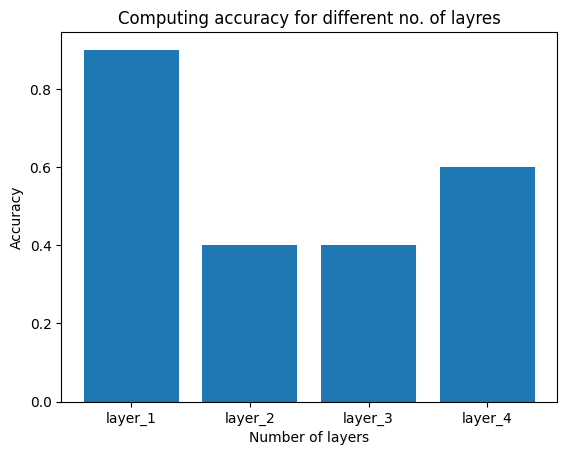

In [119]:
layers={'layer_1':0.9,'layer_2':0.4000,'layer_3':0.4000,'layer_4':0.6}
nodes = list(layers.keys())
acc = list(layers.values())
plt.bar(nodes, acc)
plt.xlabel("Number of layers")
plt.ylabel("Accuracy")
plt.title("Computing accuracy for different no. of layres")
plt.show()